### Import all the libraries and packages required

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Unzip the folder if the folder is zipped

In [0]:
## Unzip the folder and extract it to the same location as the zipped file
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/chest_xray.zip', 'r') as zip_ref:
  zip_ref.extractall('')

### To view an image

In [19]:
import cv2
from google.colab.patches import cv2_imshow
path = "/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
image = cv2.imread(path) 
  
# Window name in which image is displayed 
window_name = 'image'
  
# Using cv2.imshow() method  
# Displaying the image  
cv2_imshow(image)  

## print shape of image
print(image.shape)

Output hidden; open in https://colab.research.google.com to view.

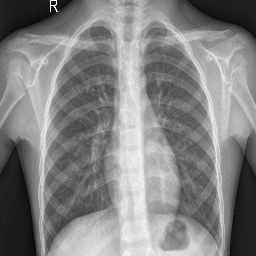

(256, 256, 3)


In [20]:
path = "/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg"
image = cv2.imread(path) 
image = cv2.resize(image,(256,256))
# Window name in which image is displayed 
window_name = 'image'
  
# Using cv2.imshow() method  
# Displaying the image  
cv2_imshow(image)  
print(image.shape)

### Readiing all the training images, appending it to a list, assigning it labels

In [0]:
## for normal patients
X = []
Y = []
import os
images_name = os.listdir('/content/chest_xray/train/NORMAL')
for i in range(len(images_name)):
  try:
    img = cv2.imread('/content/chest_xray/train/NORMAL/'+ images_name[i])
    img = cv2.resize(img,(256,256))
    X.append(img)
    Y.append(1)
  except:
    pass

In [0]:
## for pneumonia patients
import os
images_name = os.listdir('/content/chest_xray/train/PNEUMONIA')
for i in range(len(images_name)):
  try:
    img = cv2.imread('/content/chest_xray/train/PNEUMONIA/'+ images_name[i])
    img = cv2.resize(img,(256,256))
    X.append(img)
    Y.append(0)
  except:
    pass

### Readiing all the testing images, appending it to a list, assigning it labels

In [0]:
## for normal patients
X1 = []
Y1 = []
import os
images_name = os.listdir('/content/chest_xray/test/NORMAL')
for i in range(len(images_name)):
  try:
    img = cv2.imread('/content/chest_xray/test/NORMAL/'+ images_name[i])
    img = cv2.resize(img,(256,256))
    X1.append(img)
    Y1.append(1)
  except:
    pass

In [0]:
## for pneumonia patients
import os
images_name = os.listdir('/content/chest_xray/test/PNEUMONIA')
for i in range(len(images_name)):
  try:
    img = cv2.imread('/content/chest_xray/test/PNEUMONIA/'+ images_name[i])
    img = cv2.resize(img,(256,256))
    X1.append(img)
    Y1.append(0)
  except:
    pass

In [0]:
X = np.array(X)
X1 = np.array(X1)

In [0]:
X = X/255
X1 = X1/255

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add((MaxPooling2D(pool_size=(2,2))))

model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add((MaxPooling2D(pool_size=(2,2))))



model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
model.fit(X,Y,epochs = 10, batch_size=50)  #epochs is the number of times back propogation happens

Train on 5216 samples
Epoch 1/10
5216/5216 [==============================] - 15s 3ms/sample - loss: 0.3633 - acc: 0.8556
Epoch 2/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.1518 - acc: 0.9456
Epoch 3/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0856 - acc: 0.9693
Epoch 4/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0560 - acc: 0.9803
Epoch 5/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0456 - acc: 0.9843
Epoch 6/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0271 - acc: 0.9906
Epoch 7/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0296 - acc: 0.9900
Epoch 8/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0183 - acc: 0.9939
Epoch 9/10
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0146 - acc: 0.9954
Epoch 10/10
5216/5216 [==============================] - 14s 3ms/sample - loss

In [0]:
_, test_accuracy = model.evaluate(X1, Y1, verbose = 0)

In [32]:
test_accuracy

0.7548077